In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from nltk.corpus import stopwords
import nltk
import string
from itertools import compress
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('usedCarListingCleaned.csv')
del df['Unnamed: 0']
print(df.shape)
df.head()

(9702, 22)


,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,Ford,Fusion,SE FWD,Blue Mound,TX,32253,14400,White Platinum Metallic Tri-Coat,Medium Light Stone,...,1.5L Inline-4 Gas Turbocharged,Automatic,FWD,Gas,"['Navigation', 'Backup Camera', 'Cruise Contro...",False,0,Fleet or Mixed Use,Clean,1
1,2007,BMW,6,650i Convertible,Stanton,CA,59664,11499,Mineral Silver Metallic,Tan,...,4.8L V-8 Gas,Automatic,RWD,Gas,[],False,0,Fleet or Mixed Use,Clean,3
2,2019,Kia,Optima,LX,Thornton,CO,4816,18586,Ebony Black,Black,...,2.4L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Lane Keep Assist', 'Blueto...",True,1,Personal or Rental Use,Clean,2
3,2017,Ford,Fusion,SE FWD,Denver,NC,99515,8999,Shadow Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,1,Fleet or Mixed Use,Clean,2
4,2017,Hyundai,Elantra,SE 2.0L Sedan Automatic (alt),Wesley Chapel,FL,117200,6109,Quartz White Pearl,Beige,...,2.0L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth']",False,1,Personal or Rental Use,Clean,1


In [15]:
df.popular_feature

0       ['Navigation', 'Backup Camera', 'Cruise Contro...
1                                                      []
2       ['Cruise Control', 'Lane Keep Assist', 'Blueto...
3        ['Cruise Control', 'Bluetooth', 'Backup Camera']
4                         ['Cruise Control', 'Bluetooth']
                              ...                        
9697                                                   []
9698                                                   []
9699                                                   []
9700                                                   []
9701    ['Front Heated Seats', 'Backup Camera', 'Cruis...
Name: popular_feature, Length: 9702, dtype: object

In [18]:
## get the index of empty features data rows from the dataset
empty_index = []
for i in range(len(df)):
    if len(df.popular_feature[i]) == 2:
        empty_index.append(i)
len(empty_index)

3773

In [21]:
## exact rows with at least one feature inside.
new_df = df.drop(empty_index)

,year,make,model,sub_model,city,state,mileage,price,exterior_color,interior_color,...,engine,transmission,drive_type,fuel_type,popular_feature,cpo,num_accident,usage_type,title,num_owner
0,2017,Ford,Fusion,SE FWD,Blue Mound,TX,32253,14400,White Platinum Metallic Tri-Coat,Medium Light Stone,...,1.5L Inline-4 Gas Turbocharged,Automatic,FWD,Gas,"['Navigation', 'Backup Camera', 'Cruise Contro...",False,0,Fleet or Mixed Use,Clean,1
2,2019,Kia,Optima,LX,Thornton,CO,4816,18586,Ebony Black,Black,...,2.4L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Lane Keep Assist', 'Blueto...",True,1,Personal or Rental Use,Clean,2
3,2017,Ford,Fusion,SE FWD,Denver,NC,99515,8999,Shadow Black,Black,...,2.5L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,1,Fleet or Mixed Use,Clean,2
4,2017,Hyundai,Elantra,SE 2.0L Sedan Automatic (alt),Wesley Chapel,FL,117200,6109,Quartz White Pearl,Beige,...,2.0L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth']",False,1,Personal or Rental Use,Clean,1
5,2017,Honda,Civic,LX Hatchback CVT,Duluth,GA,102068,9985,Crystal Black Pearl,Select,...,1.5L Inline-4 Gas Turbocharged,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,2,Fleet or Mixed Use,Clean,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,2015,Ford,Focus,Electric Hatchback,Stafford,TX,26823,11750,Tuxedo Black,Tan,...,L - Electric,Automatic,FWD,Electric,"['Navigation', 'Cruise Control', 'Bluetooth', ...",False,0,Personal or Rental Use,Clean,1
9692,2017,Ford,Escape,SE FWD,Virginia Beach,VA,28047,14995,Magnetic Metallic,Medium Light Stone,...,1.5L Inline-4 Gas Turbocharged,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,0,Personal or Rental Use,Clean,1
9693,2017,Nissan,Rogue,SL AWD,Blue Mound,TX,30602,18900,Gun Metallic,Charcoal,...,2.5L Inline-4 Gas,Automatic,AWD,Gas,"['Power Trunk/Liftgate', 'Front Heated Seats',...",False,0,Fleet or Mixed Use,Clean,1
9695,2017,Hyundai,Elantra,SE 2.0L Sedan Automatic,Greeley,CO,68192,10544,Electric Blue,Gray,...,2.0L Inline-4 Gas,Automatic,FWD,Gas,"['Cruise Control', 'Bluetooth', 'Backup Camera']",False,0,Personal or Rental Use,Clean,1


In [78]:
new_df['feature_set'] = new_df.popular_feature.apply(lambda x: x[1:-1].split(', '))
len(new_df)

5929

In [63]:
new_df['features'] = None
feature_bag = []
for i in new_df.index:
    new_df['features'][i] = [feature[1:-1] for feature in new_df.feature_set[i]]
    for feature in new_df.feature_set[i]:
        feature_bag.append(feature[1:-1])
print(new_df.features)
print(feature_bag)

0       [Navigation, Backup Camera, Cruise Control, Bl...
2       [Cruise Control, Lane Keep Assist, Bluetooth, ...
3              [Cruise Control, Bluetooth, Backup Camera]
4                             [Cruise Control, Bluetooth]
5              [Cruise Control, Bluetooth, Backup Camera]
                              ...                        
9691    [Navigation, Cruise Control, Bluetooth, Front ...
9692           [Cruise Control, Bluetooth, Backup Camera]
9693    [Power Trunk/Liftgate, Front Heated Seats, Cru...
9695           [Cruise Control, Bluetooth, Backup Camera]
9701    [Front Heated Seats, Backup Camera, Cruise Con...
Name: features, Length: 5929, dtype: object
['Navigation', 'Backup Camera', 'Cruise Control', 'Bluetooth', 'Cruise Control', 'Lane Keep Assist', 'Bluetooth', 'Blind Spot System', 'Backup Camera', 'Cruise Control', 'Bluetooth', 'Backup Camera', 'Cruise Control', 'Bluetooth', 'Cruise Control', 'Bluetooth', 'Backup Camera', 'Cruise Control', 'Bluetooth', 'Front H

In [77]:
## total data rows are 5929.
count = Counter(feature_bag)
count

Counter({'Navigation': 1330,
         'Backup Camera': 4285,
         'Cruise Control': 5864,
         'Bluetooth': 5214,
         'Lane Keep Assist': 614,
         'Blind Spot System': 1162,
         'Front Heated Seats': 2381,
         'Remote Engine Start': 2038,
         'Power Trunk/Liftgate': 866,
         'Moonroof': 1219,
         'Front Cooled Seats': 387})

In [89]:
print('The top 3 features are Cruise Control, Bluetooth and Backup Camera, \
and there are {:.0%} with Cruise Control, {:.0%} with Bluetooth and {:.0%} with \
Backup Camera'.format(5864/len(new_df), 5214/len(new_df), 4285/len(new_df)))

The top 3 features are Cruise Control, Bluetooth and Backup Camera, and there are 99% with Cruise Control, 88% with Bluetooth and 72% with Backup Camera


Text(0, 0.5, 'Counts')

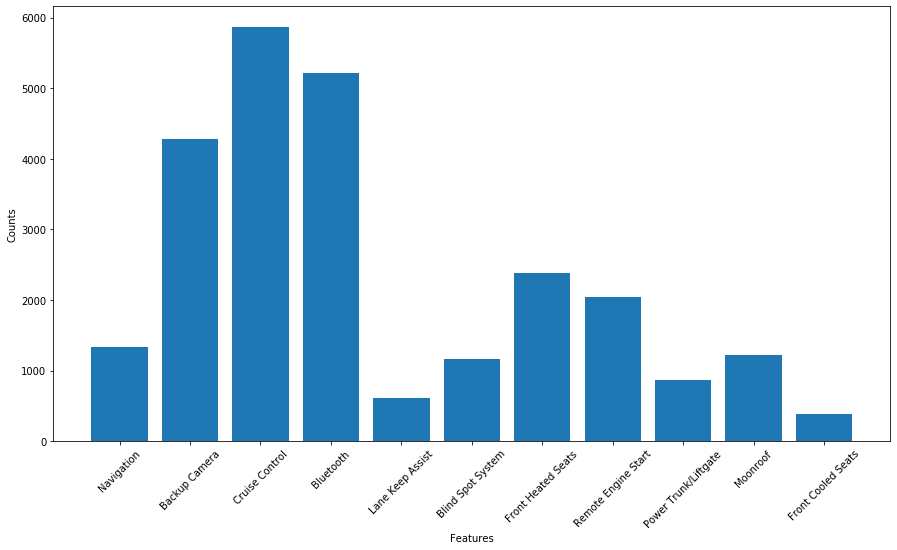

In [91]:
# Counts of features in Listings
plt.figure(figsize=(15,8))
plt.bar(count.keys(), count.values())
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Counts')